# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import seaborn as sns

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

569

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [44]:
city_name = []
lat = []
long =[]
max_temp =[]
humidity =[]
clouds =[]
wind =[]
cntry = []
date =[] 

url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'imperial'
print('Begin Data Retreival')
print('----------------------------')
for index , city in enumerate(cities, start=1):
    try:
        query_url = url + "appid=" + weather_api_key + '&units='+ units + "&q=" + city
        response = requests.get(query_url)
        print(f"Processing Weather Data {index} | {city}")
        city_name.append(response.json()['name'])
        lat.append(response.json()['coord']['lat'])
        long.append(response.json()['coord']['lon'])
        max_temp.append(response.json()['main']['temp_max'])
        humidity.append(response.json()['main']['humidity'])
        clouds.append(response.json()['clouds']['all'])
        wind.append(response.json()['wind']['speed'])
        cntry.append(response.json()['sys']['country'])
        date.append(response.json()['dt'])
        
    except:
        print('City Not Found. Skipping to next city')
print('----------------------------')
print('End of Data Retrieval')
   
     
    

Begin Data Retreival
----------------------------
Processing Weather Data 1 | san juan de los lagos
Processing Weather Data 2 | tura
Processing Weather Data 3 | bredasdorp
Processing Weather Data 4 | bluff
Processing Weather Data 5 | taolanaro
City Not Found. Skipping to next city
Processing Weather Data 6 | butaritari
Processing Weather Data 7 | rikitea
Processing Weather Data 8 | moree
Processing Weather Data 9 | salvacion
Processing Weather Data 10 | avarua
Processing Weather Data 11 | tubuala
Processing Weather Data 12 | amderma
City Not Found. Skipping to next city
Processing Weather Data 13 | arraial do cabo
Processing Weather Data 14 | ushuaia
Processing Weather Data 15 | jamestown
Processing Weather Data 16 | maldonado
Processing Weather Data 17 | nara
Processing Weather Data 18 | punta arenas
Processing Weather Data 19 | ochakiv
Processing Weather Data 20 | general roca
Processing Weather Data 21 | kapaa
Processing Weather Data 22 | nantucket
Processing Weather Data 23 | herma

Processing Weather Data 194 | makakilo city
Processing Weather Data 195 | sao filipe
Processing Weather Data 196 | yenagoa
Processing Weather Data 197 | buraydah
Processing Weather Data 198 | udachnyy
Processing Weather Data 199 | vidim
Processing Weather Data 200 | rocha
Processing Weather Data 201 | east london
Processing Weather Data 202 | cidreira
Processing Weather Data 203 | narsaq
Processing Weather Data 204 | north platte
Processing Weather Data 205 | kutum
Processing Weather Data 206 | bac lieu
Processing Weather Data 207 | mar del plata
Processing Weather Data 208 | zambezi
Processing Weather Data 209 | chifeng
Processing Weather Data 210 | husavik
Processing Weather Data 211 | santa maria
Processing Weather Data 212 | maragogi
Processing Weather Data 213 | bethel
Processing Weather Data 214 | thompson
Processing Weather Data 215 | balabac
Processing Weather Data 216 | hamilton
Processing Weather Data 217 | cabo san lucas
Processing Weather Data 218 | kpandae
Processing Weath

Processing Weather Data 383 | novikovo
Processing Weather Data 384 | umzimvubu
City Not Found. Skipping to next city
Processing Weather Data 385 | vilyuysk
Processing Weather Data 386 | bendigo
Processing Weather Data 387 | the valley
Processing Weather Data 388 | kwekwe
Processing Weather Data 389 | joniskis
Processing Weather Data 390 | chara
Processing Weather Data 391 | kholm
Processing Weather Data 392 | port lincoln
Processing Weather Data 393 | marquette
Processing Weather Data 394 | dolores
Processing Weather Data 395 | tilichiki
Processing Weather Data 396 | galle
Processing Weather Data 397 | maumere
Processing Weather Data 398 | pechenga
Processing Weather Data 399 | baykit
Processing Weather Data 400 | adrar
Processing Weather Data 401 | san patricio
Processing Weather Data 402 | whitley bay
Processing Weather Data 403 | sao joaquim
Processing Weather Data 404 | tevaitoa
Processing Weather Data 405 | burnie
Processing Weather Data 406 | yar-sale
Processing Weather Data 407 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [45]:
df = pd.DataFrame({'City Name': city_name,
     'Lat':lat,
     'Lon': long,
     'Max Temperature': max_temp,
     'Humidity': humidity,
     'Cloudiness':clouds,
     'Wind Speed':wind,
     'Country':cntry,
     'Date':date})
df.set_index('City Name', inplace = True)
display(df)

,Lat,Lon,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
City Name,,,,,,,,
San Juan de los Lagos,21.2500,-102.3000,73.40,17,1,6.91,MX,1618503083
Tura,25.5198,90.2201,81.07,28,100,4.83,IN,1618503084
Bredasdorp,-34.5322,20.0403,68.00,64,100,13.80,ZA,1618503084
Bluff,-46.6000,168.3333,51.01,93,100,1.01,NZ,1618503084
Butaritari,3.0707,172.7902,81.95,76,100,9.37,KI,1618503085
...,...,...,...,...,...,...,...,...
Tomatlán,19.9333,-105.2500,84.15,38,0,4.76,MX,1618503263
Rumphi,-11.0186,33.8575,65.75,95,93,2.98,MW,1618503263
Shumskiy,54.8318,99.1328,24.48,92,49,3.67,RU,1618503263


In [46]:
df.to_csv(path_or_buf = output_data_file)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [47]:
humid_af = df[df['Humidity']> 100 ]
humid_af

,Lat,Lon,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
City Name,,,,,,,,


In [48]:
#  Get the indices of cities that have humidity over 100%.
display(humid_af)


,Lat,Lon,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
City Name,,,,,,,,


In [49]:
clean_city_data = df[df['Humidity']<= 100] 

In [50]:
display(clean_city_data)
display(clean_city_data.describe())

,Lat,Lon,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
City Name,,,,,,,,
San Juan de los Lagos,21.2500,-102.3000,73.40,17,1,6.91,MX,1618503083
Tura,25.5198,90.2201,81.07,28,100,4.83,IN,1618503084
Bredasdorp,-34.5322,20.0403,68.00,64,100,13.80,ZA,1618503084
Bluff,-46.6000,168.3333,51.01,93,100,1.01,NZ,1618503084
Butaritari,3.0707,172.7902,81.95,76,100,9.37,KI,1618503085
...,...,...,...,...,...,...,...,...
Tomatlán,19.9333,-105.2500,84.15,38,0,4.76,MX,1618503263
Rumphi,-11.0186,33.8575,65.75,95,93,2.98,MW,1618503263
Shumskiy,54.8318,99.1328,24.48,92,49,3.67,RU,1618503263


,Lat,Lon,Max Temperature,Humidity,Cloudiness,Wind Speed,Date
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,5.170000e+02
mean,18.918394,19.805758,60.022650,68.003868,56.040619,7.814894,1.618503e+09
std,34.283194,91.344893,24.156535,23.141040,36.992356,5.519103,1.021758e+02
min,-54.800000,-175.200000,-20.870000,3.000000,0.000000,0.430000,1.618503e+09
25%,-9.660800,-61.300300,46.400000,56.000000,20.000000,3.560000,1.618503e+09
50%,21.390600,29.086400,66.200000,72.000000,63.000000,6.460000,1.618503e+09
75%,49.236100,98.300000,79.000000,87.000000,91.000000,10.360000,1.618503e+09
max,78.218600,179.316700,103.710000,100.000000,100.000000,35.790000,1.618503e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

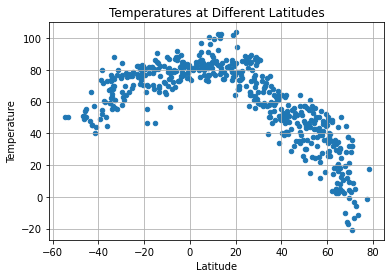

In [51]:
clean_city_data.plot.scatter(x = 'Lat' , y = 'Max Temperature', grid = True)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Temperatures at Different Latitudes')
plt.text();

## Latitude vs. Humidity Plot

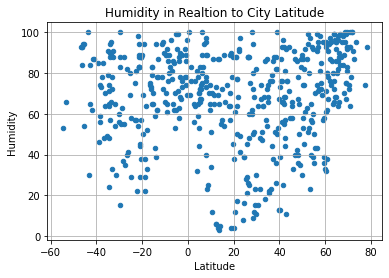

In [52]:
clean_city_data.plot.scatter(x = 'Lat' , y = 'Humidity', grid = True)
plt.xlabel('Latitude')
plt.title('Humidity in Realtion to City Latitude');

## Latitude vs. Cloudiness Plot

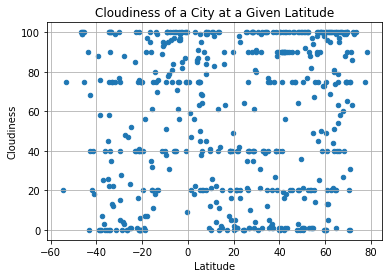

In [53]:
clean_city_data.plot.scatter(x = 'Lat' , y = 'Cloudiness', grid = True)
plt.xlabel('Latitude')
plt.title('Cloudiness of a City at a Given Latitude');

## Latitude vs. Wind Speed Plot

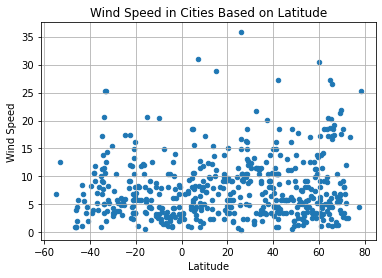

In [54]:
clean_city_data.plot.scatter(x = 'Lat' , y = 'Wind Speed', grid = True)
plt.xlabel('Latitude')
plt.title('Wind Speed in Cities Based on Latitude');

## Linear Regression

In [55]:
north = clean_city_data[clean_city_data['Lat']>=0]
south =  clean_city_data[clean_city_data['Lat']<=0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The R_value is: -0.8884068552872356


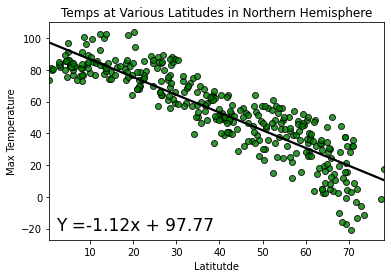

In [95]:
slope, intercept, r_value, p_value, std_err = linregress(x = north['Lat'],y = north['Max Temperature'])

sns.regplot(x=north['Lat'], y = north['Max Temperature'],
            scatter_kws={"color": "green", 'edgecolors': 'black'},line_kws={"color": "black"}, ci=0)
plt.xlabel('Latitutde')
plt.title('Temps at Various Latitudes in Northern Hemisphere')
plt.text(2,-21, f'Y ={slope.round(2)}x + {intercept.round(2)}', fontsize = 17, color = 'black')
print(f'The R_value is: {r_value}')


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The R_value is: 0.6691576856056624


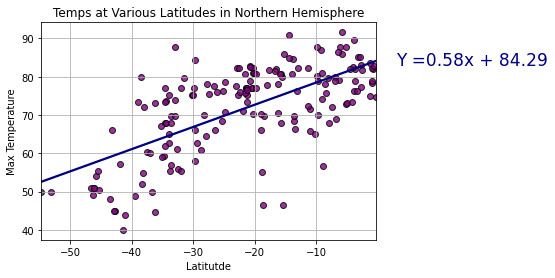

In [94]:
slope, intercept, r_value, p_value, std_err = linregress(x = south['Lat'],y = south['Max Temperature'])

sns.regplot(x=south['Lat'], y = south['Max Temperature'],
            scatter_kws={"color": "purple", 'edgecolors': 'Black'},line_kws={"color":"navy"}, ci=0)
plt.grid()
plt.xlabel('Latitutde')
plt.title('Temps at Various Latitudes in Northern Hemisphere')
plt.text(3,83, f'Y ={slope.round(2)}x + {intercept.round(2)}', fontsize = 17, color = 'navy')
print(f'The R_value is: {r_value}')


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The R_value is: 0.27982913374930174


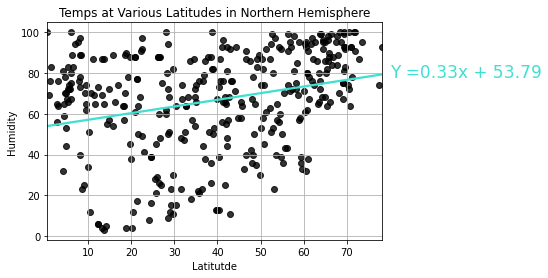

In [90]:
slope, intercept, r_value, p_value, std_err = linregress(x = north['Lat'],y = north['Humidity'])

sns.regplot(x=north['Lat'], y = north['Humidity'],
            scatter_kws={"color": "Black", 'edgecolors': 'Black'},line_kws={"color":"turquoise"}, ci=0)
plt.grid()
plt.xlabel('Latitutde')
plt.title('Temps at Various Latitudes in Northern Hemisphere')
plt.text(80,78, f'Y ={slope.round(2)}x + {intercept.round(2)}', fontsize = 17, color = 'turquoise')
print(f'The R_value is: {r_value}')


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The R_value is: 0.13943092377619068


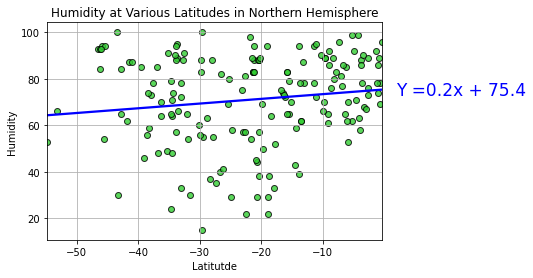

In [88]:
slope, intercept, r_value, p_value, std_err = linregress(x = south['Lat'],y = south['Humidity'])

sns.regplot(x=south['Lat'], y = south['Humidity'],
            scatter_kws={"color": "Limegreen", 'edgecolors': 'Black'},line_kws={"color":"Blue"}, ci=0)
plt.grid()
plt.xlabel('Latitutde')
plt.title('Humidity at Various Latitudes in Northern Hemisphere')
plt.text(2,73, f'Y ={slope.round(2)}x + {intercept.round(2)}', fontsize = 17, color = 'Blue')
print(f'The R_value is: {r_value}')


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The R_value is: 0.16615810890224336


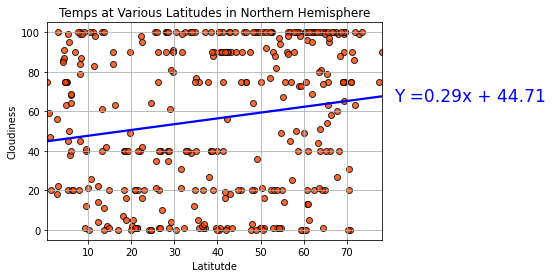

In [83]:
slope, intercept, r_value, p_value, std_err = linregress(x = north['Lat'],y = north['Cloudiness'])

sns.regplot(x=north['Lat'], y = north['Cloudiness'],
            scatter_kws={"color": "Orangered", 'edgecolors': 'Black'},line_kws={"color":"blue"}, ci=0)
plt.grid()
plt.xlabel('Latitutde')
plt.title('Temps at Various Latitudes in Northern Hemisphere')
plt.text(81,65, f'Y ={slope.round(2)}x + {intercept.round(2)}', fontsize = 17, color = 'Blue')
print(f'The R_value is: {r_value}')


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The R_value is: 0.26611656157787045


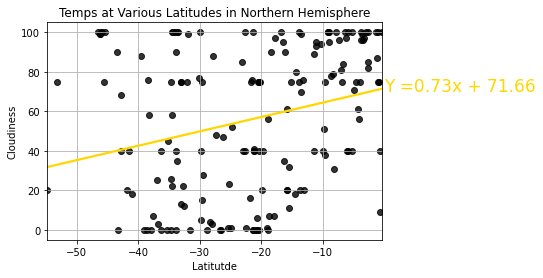

In [79]:
slope, intercept, r_value, p_value, std_err = linregress(x = south['Lat'],y = south['Cloudiness'])

sns.regplot(x=south['Lat'], y = south['Cloudiness'],
            scatter_kws={"color": "Black", 'edgecolors': 'Black'},line_kws={"color":"gold"}, ci=0)
plt.grid()
plt.xlabel('Latitutde')
plt.title('Temps at Various Latitudes in Northern Hemisphere')
plt.text(0,70, f'Y ={slope.round(2)}x + {intercept.round(2)}', fontsize = 17, color = 'gold')
print(f'The R_value is: {r_value}')


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The R_value is: 0.06764748854728579


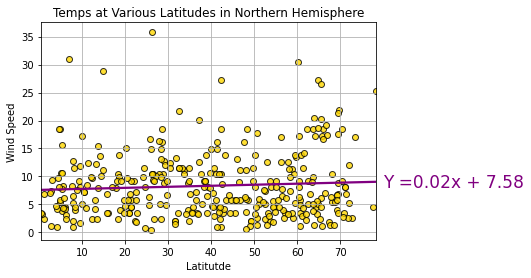

In [74]:
slope, intercept, r_value, p_value, std_err = linregress(x = north['Lat'],y = north['Wind Speed'])

sns.regplot(x=north['Lat'], y = north['Wind Speed'],
            scatter_kws={"color": "gold", 'edgecolors': 'Black'},line_kws={"color":"purple"}, ci=0)
plt.grid()
plt.xlabel('Latitutde')
plt.title('Temps at Various Latitudes in Northern Hemisphere')
plt.text(80,8, f'Y ={slope.round(2)}x + {intercept.round(2)}', fontsize = 17, color = 'purple')
print(f'The R_value is: {r_value}')


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The R_value is: -0.12416807428128256


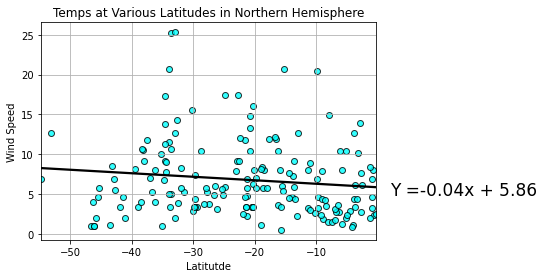

In [78]:
slope, intercept, r_value, p_value, std_err = linregress(x = south['Lat'],y = south['Wind Speed'])

sns.regplot(x=south['Lat'], y = south['Wind Speed'],
            scatter_kws={"color": "aqua", 'edgecolors': 'Black'},line_kws={"color":"black"}, ci=0)
plt.grid()
plt.xlabel('Latitutde')
plt.title('Temps at Various Latitudes in Northern Hemisphere')
plt.text(2,4.9, f'Y ={slope.round(2)}x + {intercept.round(2)}', fontsize = 17, color = 'black')
print(f'The R_value is: {r_value}')
